In [1]:
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import TimeoutException, WebDriverException
from selenium.webdriver.common.by import By
from urllib.parse import urljoin
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd

In [2]:
COUNT_PAGES = 1000

def main():
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)

    df = pd.DataFrame(columns=["name", "address"])
    for page in range(1, COUNT_PAGES):

        url = f"https://uchi.ru/schools/pages?page={page}"
        driver.get(url)
        time.sleep(1)
        res1 = driver.find_elements(By.CLASS_NAME, "table__name")
        res2 = driver.find_elements(By.CLASS_NAME, "table__address")
        for e1, e2 in zip(res1, res2):
            df.loc[len(df)] = [e1.get_attribute('textContent'), e2.get_attribute('textContent')]
    driver.close()

    display(df)
    return df

df = main()

KeyboardInterrupt: 

In [17]:
def parse_olymp():
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)

    df = pd.DataFrame(columns=["name", "subject", "level"])

    url = "https://olimpiada.ru/article/1043"
    driver.get(url)
    #time.sleep(0.1)

    rows = driver.find_elements(By.XPATH, "//table[@class='note_table']//tr")
    print(len(rows))

    for row in rows:
        el1 = row.find_element(By.XPATH, "./td[1]")
        el2 = row.find_element(By.XPATH, "./td[3]")
        try:
            el3 = row.find_element(By.XPATH, "./td[4]")
            df.loc[len(df)] = [el1.text, el2.text, el3.text]
        except:
            pass
        #for e1, e2, e3 in zip(el1, el2, el3):

    """
    #res1 = driver.find_elements(By.CLASS_NAME, "slim_dec")
    #res2 = driver.find_elements(By.XPATH, "//td[style='width: 40%;']")
    print(len(res2))
    #res3 = driver.find_elements(By.CLASS_NAME, "table__address")

    for e1 in res1:
        pass
        #print(e1.get_attribute('textContent'))
        #df.loc[len(df)] = [e1.get_attribute('textContent'), e2.get_attribute('textContent')]
    """
    driver.close()
    return df

df2 = parse_olymp()


324


In [20]:
df3 = df2.drop(df2[df2.name == "Наименование олимпиады"].index)
df3

,name,subject,level
1,Московская олимпиада школьников,астрономия,1
2,Санкт-Петербургская астрономическая олимпиада,астрономия,1
4,Олимпиада школьников «Ломоносов»,биология,1
5,Олимпиада школьников Санкт-Петербургского госу...,биология,1
6,Всероссийская олимпиада школьников «Высшая проба»,биология,2
...,...,...,...
307,Северо-Восточная олимпиада школьников,родные языки,педагогическое образование
308,Сибирская межрегиональная олимпиада школьников...,"архитектура, изобразительные и прикладные виды...","архитектура, дизайн, дизайн архитектурной сред..."
309,Строгановская олимпиада на базе МГХПА имени С....,"рисунок, живопись, скульптура, дизайн","искусство, дизайн"
310,Турнир имени М.В. Ломоносова,астрономия и науки о земле,астрономия


In [23]:
df3

,name,subject,level
1,Московская олимпиада школьников,астрономия,1
2,Санкт-Петербургская астрономическая олимпиада,астрономия,1
4,Олимпиада школьников «Ломоносов»,биология,1
5,Олимпиада школьников Санкт-Петербургского госу...,биология,1
6,Всероссийская олимпиада школьников «Высшая проба»,биология,2
...,...,...,...
307,Северо-Восточная олимпиада школьников,родные языки,педагогическое образование
308,Сибирская межрегиональная олимпиада школьников...,"архитектура, изобразительные и прикладные виды...","архитектура, дизайн, дизайн архитектурной сред..."
309,Строгановская олимпиада на базе МГХПА имени С....,"рисунок, живопись, скульптура, дизайн","искусство, дизайн"
310,Турнир имени М.В. Ломоносова,астрономия и науки о земле,астрономия


In [4]:
# parse laptops
items_df = pd.DataFrame(columns=["name",
                                 "category",
                                 "characteristic1",
                                 "characteristic2",
                                 "characteristic3",
                                 "characteristic4",
                                 "characteristic5",
                                 ])

deals_df = pd.DataFrame(columns=["name",
                              "price",
                              "shop"
                              ])

def parse(url, category, pages):
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)



    for i in range(1, pages + 1):

        driver.get(url + str(i))
        #time.sleep(1)

        items = driver.find_elements(By.CLASS_NAME, "model-short-block")

        for item in items:
            res = []

            # name
            res.append(item.find_element(By.CLASS_NAME, "u").text)
            res.append(category)

            # characteristics
            characteristics = item.find_element(By.CLASS_NAME, "m-s-f2").find_elements(By.TAG_NAME, "div")
            for c in characteristics:
                if c.text:
                    res.append(c.text)
            try:
                items_df.loc[len(items_df)] = res
            except:
                pass
            # deals
            try:
                prices = item.find_element(By.CLASS_NAME, "model-hot-prices")
                for deal in prices.find_elements(By.TAG_NAME, "tr"):
                    deals_df.loc[len(deals_df)] = [res[0], deal.find_element(By.CLASS_NAME, "model-shop-price").text, deal.find_element(By.CLASS_NAME, "sn-div").text]
            except:
                pass

    driver.close()



# https://n-katalog.ru/category/mobilnye-telefony/list/page-
# 170

In [12]:
url = "https://n-katalog.ru/category/noutbuki/list/page-"
parse(url, "Ноутбук", 129)
#129

In [13]:
url = "https://n-katalog.ru/category/mobilnye-telefony/list/page-"
parse(url, "Мобильный телефон", 170)
#170

In [14]:
url = "https://n-katalog.ru/category/naushniki/list/page-"
parse(url, "Наушники", 200)
#200

KeyboardInterrupt: 

In [15]:
url = "https://n-katalog.ru/category/monitory/list/page-"
parse(url, "Монитор", 75)

KeyboardInterrupt: 

In [17]:
url = "https://n-katalog.ru/category/stiralnye-mashiny/list/page-"
parse(url, "Холодильник", 23)

KeyboardInterrupt: 

In [18]:
items_df

,name,category,characteristic1,characteristic2,characteristic3,characteristic4,characteristic5
0,Asus TUF Gaming F15 FX506HCB,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
1,Huawei MateBook D 15 2021,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:интегрированная
2,Acer Nitro 5 AN515-57,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i7,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
3,Asus ROG Zephyrus G14 (2022) GA402RJ,Ноутбук,Тип:ноутбук,Диагональ экрана:14,Серия:Ryzen 7,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
4,Lenovo ThinkBook 15 G2 ITL,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:интегрированная
...,...,...,...,...,...,...,...
3664,Renova WS-70PET,Холодильник,Тип загрузки:вертикальная загрузка,Загрузка:7,Макс. скорость отжима:1350 об/мин,Сушилка:нет,Материал бака:пластик
3665,Beko WSRE 7512 XAAI,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:15 шт, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:поворотная ручка + кнопки
3666,Winia WMD-R912D1BW,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:15 шт, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:поворотная ручка + кнопки
3667,Miele WWV 980 WPS,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:своя программа, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:сенсорное


In [19]:
deals_df

,name,price,shop
0,Asus TUF Gaming F15 FX506HCB,66990 руб.,MobiComShop →
1,Asus TUF Gaming F15 FX506HCB,90110 руб.,КотоФото →
2,Huawei MateBook D 15 2021,49999 руб.,Ситилинк →
3,Huawei MateBook D 15 2021,51084 руб.,ТРУБКА →
4,Acer Nitro 5 AN515-57,73690 руб.,MobiComShop →
...,...,...,...
4209,Beko WSRE 7512 XAAI,29680 руб.,Эталон-БТ →
4210,Winia WMD-R912D1BW,30380 руб.,Эталон-БТ →
4211,Miele WWV 980 WPS,357096 руб.,ТехноторгХит →
4212,Miele WWV 980 WPS,389579 руб.,Азбука Техники →


In [20]:
items_df.to_csv("items.csv", index=False)
deals_df.to_csv("deals.csv", index=False)

In [16]:
import names
import random
USERS_COUNT = 100000

users = pd.DataFrame(columns=["email", "name", "password"])

for i in range(USERS_COUNT):
    nickname = str(names.get_first_name()) + str(random.randint(10, 99))

    v = random.randint(1, 2)
    add = ""
    if v == 1:
        add = "@gmail.com"
    if v == 2:
        add = "@hotmail.com"
    if v == 3:
        add = "@mail.com"

    email = nickname + str(random.randint(10, 99)) + add
    password = nickname + str(random.randint(1000, 9999))
    # print(nickname)
    data = [email, nickname, password]


    if email not in users.email.values:
        users.loc[len(users)] = data




KeyboardInterrupt: 

In [17]:
users.to_csv("user.csv", index=False)

In [18]:
stores = {
    "МВидео": "https://www.mvideo.ru/",
    "Ситилинк": "https://www.citilink.ru/",
    "ДНС": "https://www.dns-shop.ru/",
    "Эльдорадо": "https://www.eldorado.ru/",
    "BigGeek": "https://biggeek.ru/",
    "Связной": "https://www.svyaznoy.ru/",
    "Restore": "https://re-store.ru/",
    "Holodilnik": "https://www.holodilnik.ru/",
    "СберМегаМаркет": "https://sbermegamarket.ru/",
    "OLDI": "https://www.oldi.ru/",
    "Корпорация «Центр»": "https://kcentr.ru/",
    "Юлмарт": "https://ulmart-katalog.ru/",
    "Технопорт": "https://www.techport.ru/",
    "StoreX24": "StoreX24.ru",
    "Wishmaster": "Wishmaster.me",
    "Video Shoper": "Video-shoper.ru",
    "Sold Out": "Sold-Out.ru",
    "coxo": "coxo.ru",
    "Shop Trubka": "Shop-Trubka.ru",
    "Quke": "Quke.ru",
    "iPort": "iPort.ru",
    "123": "123.ru"
}

df_stores = pd.DataFrame(data=stores.items(), columns=["shop", "link"])
df_stores.to_csv("shop.csv", index=False)

In [19]:
items_df = pd.read_csv("items.csv")
deals_df = pd.read_csv("deals.csv")

In [20]:
# brands
df_brands = pd.DataFrame(columns=["name", "info"])
df1 = pd.DataFrame(columns=["name"])

# catefories
df_categories = pd.DataFrame([["Ноутбук", "Это ноутбук"], ["Мобильный телефон" , "Это просто мобильный телефон"], ["Наушники" , "Это наушники"], ["Монитор" , "Это монитор"],
                              ["Холодильник", "Холодильники и морозильные камеры"]], columns=["name", "discript"])


# products
df_prod = pd.DataFrame(columns=["category_id", "brand_id", "name", "date_added"])
df_prod_char = pd.DataFrame(columns=["prod_id", "char_id", "value"])
df_char = pd.DataFrame(columns=["name", "info"])

df_mod = pd.DataFrame(columns=["prod_id", "name"])

df_favor_prod = pd.DataFrame(columns=["prod_id", "mail", "date"])
df_prod_over = pd.DataFrame(columns=["prod_id", "mail", "score", "text", "date"])
df_history = pd.DataFrame(columns=["prod_id", "mail", "date"])



for i in range(items_df.shape[0]):

    # brands
    df1.loc[len(df1)] = [items_df.iloc[i]["name"].split(" ")[0]]

# brands
df1 = pd.DataFrame(df1.name.unique(), columns=["name"])
for i in range(df1.shape[0]):
    df_brands.loc[len(df_brands)] = [df1.iat[i, 0], f"Just {df1.iat[i, 0]}"]
df_brands.to_csv("brand.csv", index=False)

In [21]:
df_categories.to_csv("categories.csv", index=False)

In [22]:
import random
for i in range(items_df.shape[0]):
    date = str(random.randint(2010, 2023)) + "-" + str(random.randint(1, 12)) + "-" + str(random.randint(1, 28))

    df_prod.loc[len(df_prod)] = [df_categories.loc[df_categories['name'].isin([items_df.iat[i, 1]])].index.values[0],
                                 df_brands.loc[df_brands['name'].isin([items_df.iat[i, 0].split(" ")[0]])].index.values[0],
                                 items_df.iat[i, 0],
                                 date]

    pass
df_prod.to_csv("product.csv", index=False)

In [23]:
items_df

,name,category,characteristic1,characteristic2,characteristic3,characteristic4,characteristic5
0,Asus TUF Gaming F15 FX506HCB,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
1,Huawei MateBook D 15 2021,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:интегрированная
2,Acer Nitro 5 AN515-57,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i7,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
3,Asus ROG Zephyrus G14 (2022) GA402RJ,Ноутбук,Тип:ноутбук,Диагональ экрана:14,Серия:Ryzen 7,Объем оперативной памяти:8 ГБ,Тип видеокарты:дискретная
4,Lenovo ThinkBook 15 G2 ITL,Ноутбук,Тип:ноутбук,Диагональ экрана:15.6,Серия:Core i5,Объем оперативной памяти:8 ГБ,Тип видеокарты:интегрированная
...,...,...,...,...,...,...,...
3664,Renova WS-70PET,Холодильник,Тип загрузки:вертикальная загрузка,Загрузка:7,Макс. скорость отжима:1350 об/мин,Сушилка:нет,Материал бака:пластик
3665,Beko WSRE 7512 XAAI,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:15 шт, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:поворотная ручка + кнопки
3666,Winia WMD-R912D1BW,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:15 шт, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:поворотная ручка + кнопки
3667,Miele WWV 980 WPS,Холодильник,Тип загрузки:фронтальная загрузка,"Программы:своя программа, быстрая стирка",Защита от протечек:да,Класс стирки:A,Управление:сенсорное


In [24]:
# characteristics
df_char = pd.DataFrame(columns=["name", "info"])

for i in range(items_df.shape[0]):
    c1 = items_df.at[i, "characteristic1"].split(":")
    df_char.loc[len(df_char)] = [c1[0], str("Это характеристика под названием " + str(c1[0]))]

    c2 = items_df.at[i, "characteristic2"].split(":")
    df_char.loc[len(df_char)] = [c2[0], str("Это характеристика под названием " + str(c2[0]))]

    c3 = items_df.at[i, "characteristic3"].split(":")
    df_char.loc[len(df_char)] = [c3[0], str("Это характеристика под названием " + str(c3[0]))]

    c4 = items_df.at[i, "characteristic4"].split(":")
    df_char.loc[len(df_char)] = [c4[0], str("Это характеристика под названием " + str(c4[0]))]

    c5 = items_df.at[i, "characteristic5"].split(":")
    df_char.loc[len(df_char)] = [c5[0], str("Это характеристика под названием " + str(c5[0]))]

df_char = pd.DataFrame(df_char.name.unique(), columns=["name"])
df_char.to_csv("characteristic.csv", index=False)

In [25]:
# prod characteristics
df_prod_char = pd.DataFrame(columns=["prod_id", "char_id", "value"])

for i in range(items_df.shape[0]):
    c1 = items_df.at[i, "characteristic1"].split(":")
    id = df_char.loc[df_char['name'].isin([c1[0]])].index.values[0]
    df_prod_char.loc[len(df_prod_char)] = [i, id, c1[1]]

    c2 = items_df.at[i, "characteristic2"].split(":")
    id = df_char.loc[df_char['name'].isin([c2[0]])].index.values[0]
    df_prod_char.loc[len(df_prod_char)] = [i, id, c2[1]]

    c3 = items_df.at[i, "characteristic3"].split(":")
    id = df_char.loc[df_char['name'].isin([c3[0]])].index.values[0]
    df_prod_char.loc[len(df_prod_char)] = [i, id, c3[1]]

    c4 = items_df.at[i, "characteristic4"].split(":")
    id = df_char.loc[df_char['name'].isin([c4[0]])].index.values[0]
    df_prod_char.loc[len(df_prod_char)] = [i, id, c4[1]]

    c5 = items_df.at[i, "characteristic5"].split(":")
    id = df_char.loc[df_char['name'].isin([c5[0]])].index.values[0]
    df_prod_char.loc[len(df_prod_char)] = [i, id, c5[1]]
df_prod_char.to_csv("product_characteristic.csv", index=False)

In [26]:
df_mod_charact = pd.DataFrame([["Цвет", "Цвет устройства"], ["SSD", "Объем встроенной памяти"], ["RAM", "Объем оперативной памяти"]],
                              columns=["name", "description"])

SSD = [128, 256, 512, 1024]
RAM = [4, 8, 12, 16]
COLOR = ["Черный", "Белый", "Красный", "Темная ночь", "Комета", "Коричневый", "Черный", "Белый", "Серебристый", "Фиолетовый"]



df_mod = pd.DataFrame(columns=["product_id", "name"])
df_mod_charact_mod = pd.DataFrame(columns=["mod_char_id", "mod_id", "value"])

for i in range(df_prod.shape[0]):
    if str(df_prod.at[i, "category_id"]) == str(0) or str(df_prod.at[i, "category_id"]) == str(1):
        for j in range(2):
            ssd = random.choice(SSD)
            ram = random.choice(RAM)
            color = random.choice(COLOR)
            df_mod.loc[len(df_mod)] = [i, df_prod.at[i, "name"] + ", " + str(ssd) + ", " + str(ram) + ", " + str(color)]

            df_mod_charact_mod.loc[len(df_mod_charact_mod)] = [1, len(df_mod) - 1, ssd]
            df_mod_charact_mod.loc[len(df_mod_charact_mod)] = [2, len(df_mod) - 1, ram]
            df_mod_charact_mod.loc[len(df_mod_charact_mod)] = [0, len(df_mod) - 1, color]

df_mod_charact.to_csv("mod_characteristic.csv", index=False)
df_mod.to_csv("modification.csv", index=False)
df_mod_charact_mod.to_csv("modification_mod_characteristic.csv", index=False)


In [30]:
df_favorite_prod = pd.DataFrame(columns=["product_id", "mail", "date_added"])
df_browsing_history = pd.DataFrame(columns=["product_id", "mail", "date_added"])
df_product_overviews = pd.DataFrame(columns=["product_id", "mail", "score", "review_text", "date_added"])

EX = ["Отлично! Это невероятно хороший продукт.",
        "На самом деле прекрасный выбор!",
        "",
        "",
        "",
        "Прекрасный продукт."]

GOOD = ["Хорошо! Это хороший продукт.",
        "На самом деле хороший выбор!",
        "",
        "",
        "",
        "Хороший продукт."]

MID = ["Средненько! Это средний по качеству продукт.",
       "Ну неплохо.",
       "",
       "",
       "",
       "Просто средний продукт."]

BAD = ["Плохо! Мне не понравился.",
       "Это ну такое.",
       "",
       "",
       "",
       "ФУ. Не куплю от этого бренда больше ничего."]

for i in range(20000):
    date = str(random.randint(2010, 2023)) + "-" + str(random.randint(1, 12)) + "-" + str(random.randint(1, 28))
    us_id = random.randint(0, 80000)
    rand = random.randint(0, len(df_prod))
    df_favorite_prod.loc[len(df_favorite_prod)] = [rand,
                                                   users.at[us_id, "email"],
                                                   date]

    df_browsing_history.loc[len(df_browsing_history)] = [rand,
                                                         users.at[us_id, "email"],
                                                         date]

    if i % 2 == 0:
        score = random.randint(0, 10)
        if score > 8:
            text = random.choice(EX)
        elif score > 6:
            text = random.choice(GOOD)
        elif score > 4:
            text = random.choice(MID)
        else:
            text = random.choice(BAD)

        df_product_overviews.loc[len(df_product_overviews)] = [rand,
                                                               users.at[us_id, "email"],
                                                               random.randint(0, 10),
                                                               text,
                                                               date
        ]

    date = str(random.randint(2010, 2023)) + "-" + str(random.randint(1, 12)) + "-" + str(random.randint(1, 28))
    df_browsing_history.loc[len(df_browsing_history)] = [random.randint(0, len(df_prod)),
                                                         users.at[us_id, "email"],
                                                         date]



df_favorite_prod.to_csv("favorite_prod.csv")
df_browsing_history.to_csv("browsing_history.csv")
df_product_overviews.to_csv("product_overviews.csv")

In [31]:
df_store_overviews = pd.DataFrame(columns=["mail", "shop_id", "score", "review_text", "date_added"])

EX = ["Отлично! Это невероятно хороший магазин.",
      "На самом деле прекрасный магазин, мне все понраивлос!",
      "",
      "",
      "",
      "Прекрасный магазин."]

GOOD = ["Хорошо! Это хороший магазин.",
        "На самом деле хороший магазин!",
        "",
        "",
        "",
        "Хороший магазин."]

MID = ["Средненько! Это средний по сервису магазин.",
       "Ну неплохо.",
       "",
       "",
       "",
       "Просто средний магазин."]

BAD = ["Плохо! Мне не понравился магазин.",
       "Это ну такое.",
       "",
       "",
       "",
       "ФУ. Не куплю в этом магазине больше ничего."]

for i in range(20000):
    date = str(random.randint(2010, 2023)) + "-" + str(random.randint(1, 12)) + "-" + str(random.randint(1, 28))
    us_id = random.randint(0, 80000)
    rand = random.randint(0, len(df_stores))

    if i % 2 == 0:
        score = random.randint(0, 10)
        if score > 8:
            text = random.choice(EX)
        elif score > 6:
            text = random.choice(GOOD)
        elif score > 4:
            text = random.choice(MID)
        else:
            text = random.choice(BAD)

        df_store_overviews.loc[len(df_store_overviews)] = [users.at[us_id, "email"],
                                                            rand,

                                                               random.randint(0, 10),
                                                               text,
                                                               date
                                                               ]




df_store_overviews.to_csv("store_overviews.csv", index=False)

In [32]:
# offers и все!!!!
df_offers = pd.DataFrame(columns=["modif_id", "shop_id", "cost", "link"])

# random
# shops 23
# mod 5962

for i in range(13092):
    shop_id = random.randint(0, 21)
    mod_id = random.randint(0, 5961)
    cost = random.randint(10000, 150000)
    link = df_stores.at[shop_id, "link"]

    df_offers.loc[len(df_offers)] = [mod_id, shop_id, cost, link]
df_offers.to_csv("offer.csv", index=False)

In [59]:
df_offers.shape

(13092, 4)

In [53]:
df_prod.head()

,category_id,brand_id,name,date_added
0,0,0,Asus TUF Gaming F15 FX506HCB,2020-8-22
1,0,1,Huawei MateBook D 15 2021,2010-5-22
2,0,2,Acer Nitro 5 AN515-57,2023-3-22
3,0,0,Asus ROG Zephyrus G14 (2022) GA402RJ,2016-9-9
4,0,3,Lenovo ThinkBook 15 G2 ITL,2021-4-18


In [48]:
df_stores.head()

,shop,link
0,МВидео,https://www.mvideo.ru/
1,Ситилинк,https://www.citilink.ru/
2,ДНС,https://www.dns-shop.ru/
3,Эльдорадо,https://www.eldorado.ru/
4,BigGeek,https://biggeek.ru/


In [25]:
def parse_services():
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)

    df = pd.DataFrame(columns=["name"])

    url = "http://spb-3.ru/patients/okazanie-platnykh-uslug/perechen-platnykh-uslug"
    driver.get(url)
    time.sleep(1)
    table = driver.find_element(By.XPATH, '//*[@id="component"]/div[2]/div[2]/table/tbody')
    elements = table.find_elements(By.TAG_NAME, "tr")



    for el in elements:
        try:
            name = el.find_elements(By.TAG_NAME, "td")[1]
            print(name.text)
            df.loc[len(df)] = [name.text]
        except:
            pass

    driver.close()
    return df

df_res = parse_services()
df_res.to_csv("services.csv")

Наименование
Койко-день в стационаре (профиль психиатрический (психоневрологический) для взрослых)
Определение уровня общего магния в сыворотке крови на автоматическом анализаторе
Определение аланин-аминотрансферазы в сыворотке крови на автоматическом анализаторе
Определение аспартат-аминотрансферазы в сыворотке крови на автоматическом анализаторе
Определение холестерина в сыворотке крови на автоматическом анализаторе
Определение общего белка в сыворотке крови на автоматическом анализаторе
Определение неорганического фосфора в сыворотке крови на автоматическом анализаторе
Взятие крови из периферической вены
Общий (клинический) анализ крови
Анализ мочи общий на автоматическом анализаторе
Определение С-реактивного белка в сыворотке крови
Определение скорости оседания эритроцитов крови
Определение аланин-аминотрансферазы в сыворотке крови на автоматическом анализаторе
Определение аспартат-аминотрансферазы в сыворотке крови на автоматическом анализаторе
Определение амилазы в сыворотке кров

In [26]:
lst = ["ВРАЧ-АЛЛЕРГОЛОГ",
"ВРАЧ-АНЕСТЕЗИОЛОГ-РЕАНИМАТОЛОГ",
"ВРАЧ-ЭПИДЕМИОЛОГ, ВРАЧ-ДЕЗИНФЕКЦИОНИСТ",
"ВРАЧ-КАРДИОЛОГ",
"ВРАЧ-ОНКОЛОГ",
"ВРАЧ-ТРАВМАТОЛОГ-ОРТОПЕД",
"ВРАЧ-ФИЗИОТЕРАПЕВТ",
"ВРАЧ-СУДЕБНО-МЕДИЦИНСКИЙ ЭКСПЕРТ",
"САНИТАРНЫЙ ВРАЧ",
"ВРАЧ-РЕНТГЕНОЛОГ",
"ВРАЧ-ТОКСИКОЛОГ",
"ВРАЧ-ПУЛЬМОНОЛОГ",
"ВРАЧ-УРОЛОГ",
"ВРАЧ-ТЕРАПЕВТ",
"ВРАЧ-ПЕДИАТР",
"ВРАЧ-ИНФЕКЦИОНИСТ",
"ВРАЧ-ХИРУРГ",
"ВРАЧ АКУШЕР-ГИНЕКОЛОГ",
"ВРАЧ-НЕВРОПАТОЛОГ",
"ВРАЧ-ПСИХИАТР",
"ВРАЧ-НАРКОЛОГ",
"ВРАЧ-ОФТАЛЬМОЛОГ",
"ВРАЧ-ОТОЛАРИНГОЛОГ",
"ВРАЧ-ДЕРМАТОВЕНЕРОЛОГ",
"ВРАЧ-СТОМАТОЛОГ",
"ВРАЧ «СКОРОЙ И НЕОТЛОЖНОЙ МЕДИЦИНСКОЙ ПОМОЩИ»",
"ФАРМАЦЕВТ",
"СЕМЕЙНЫЙ ВРАЧ, ИЛИ ВРАЧ ОБЩЕЙ ПРАКТИКИ",
"АКУШЕРКА, ФЕЛЬДШЕР",
"МЕДИЦИНСКАЯ СЕСТРА",
"ЗУБНОЙ ТЕХНИК"]

df_spec = pd.DataFrame(lst, columns=["names"])
df_spec.to_csv("spec.csv", index=False)



In [27]:
df = pd.read_csv("spec.csv")
df

,names
0,ВРАЧ-АЛЛЕРГОЛОГ
1,ВРАЧ-АНЕСТЕЗИОЛОГ-РЕАНИМАТОЛОГ
2,"ВРАЧ-ЭПИДЕМИОЛОГ, ВРАЧ-ДЕЗИНФЕКЦИОНИСТ"
3,ВРАЧ-КАРДИОЛОГ
4,ВРАЧ-ОНКОЛОГ
5,ВРАЧ-ТРАВМАТОЛОГ-ОРТОПЕД
6,ВРАЧ-ФИЗИОТЕРАПЕВТ
7,ВРАЧ-СУДЕБНО-МЕДИЦИНСКИЙ ЭКСПЕРТ
8,САНИТАРНЫЙ ВРАЧ
9,ВРАЧ-РЕНТГЕНОЛОГ


In [34]:
df.loc[2][0].split(",")

['ВРАЧ-ЭПИДЕМИОЛОГ', ' ВРАЧ-ДЕЗИНФЕКЦИОНИСТ']

Text(0.5, 1.0, 'Гистограмма количества моделей «Laptop» по объему SSD')

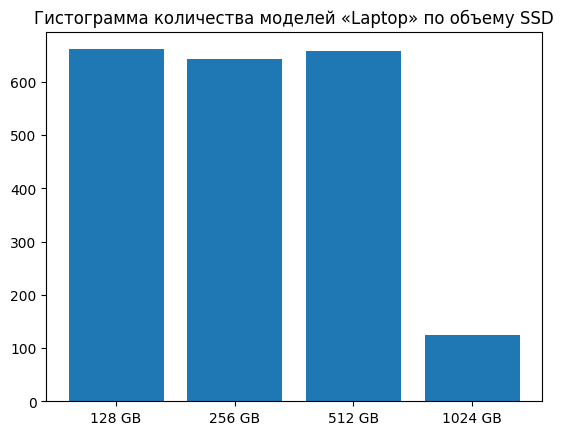

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

count = [661, 642, 657, 125]
value = ["128 GB", "256 GB", "512 GB", "1024 GB"]

fig, ax = plt.subplots()
ax.bar(value, count)
ax.set_title("Гистограмма количества моделей «Laptop» по объему SSD")

Text(0.5, 1.0, 'Диаграмма количества товаров в разных ценовых категориях')

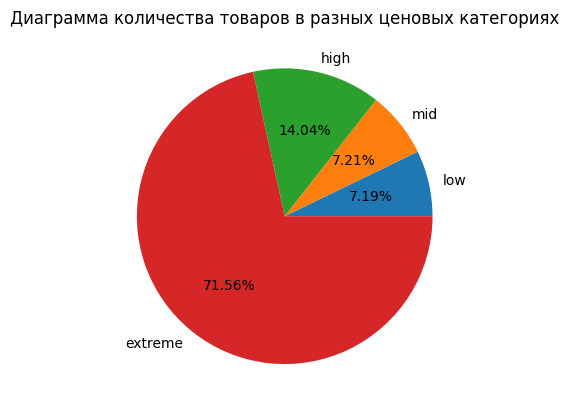

In [18]:
count = [941, 944, 1838, 9369]
value = ["low", "mid", "high", "extreme"]

fig, ax = plt.subplots()
ax.pie(count, labels=value, autopct='%1.2f%%')
ax.set_title("Диаграмма количества товаров в разных ценовых категориях")